In [1]:
from pathlib import Path
import sys

sys.path.append(str(Path.cwd().parent))

from data.preprocess import preprocess_data
from data.vars import ML_COLS
from data.utils import split_train_val_test, get_X_y
from utils import save_model, set_seed, evaluate_model

from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
set_seed(42)

Semente aleatória definida: 42


In [3]:
df = preprocess_data()

# display(df)

Index(['aluno_id', 'aluno_status', 'plano_id', 'plano_nome', 'checkin_id',
       'checkin_data_entrada', 'checkin_duracao_treino'],
      dtype='object')


In [4]:
train_data, val_data, test_data = split_train_val_test(df, test_size=0.2, val_size=0.2)

X_train, y_train = get_X_y(train_data)
X_val, y_val = get_X_y(val_data)
X_test, y_test = get_X_y(test_data)

Tamanho do conjunto de treino: 276 registros
Tamanho do conjunto de validação: 70 registros
Tamanho do conjunto de teste: 87 registros


In [5]:
# Treinar o modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Avaliar o modelo
y_pred = modelo.predict(X_test)
metrics = evaluate_model(model=modelo, X_test=X_test, y_test=y_test)

In [8]:
print("Relatório de Classificação:")
# Display metrics in a readable format
for key, value in metrics.items():
    if key != 'feature_importances':  # Handle feature importances separately
        print(f"{key.capitalize()}: {value:.4f}")

# Print detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

# Display feature importances
print("\nFeature Importances:")
feature_names = X_train.columns
importances = metrics['feature_importances']
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance:.4f}")

Relatório de Classificação:
Accuracy: 0.9080
Precision: 0.7895
Recall: 0.7895
F1: 0.7895

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.79      0.79      0.79        19

    accuracy                           0.91        87
   macro avg       0.87      0.87      0.87        87
weighted avg       0.91      0.91      0.91        87


Feature Importances:
frequencia_semanal: 0.2088
dias_desde_ultimo_checkin: 0.6603
tempo_medio_na_academia: 0.0882
plano_id: 0.0427


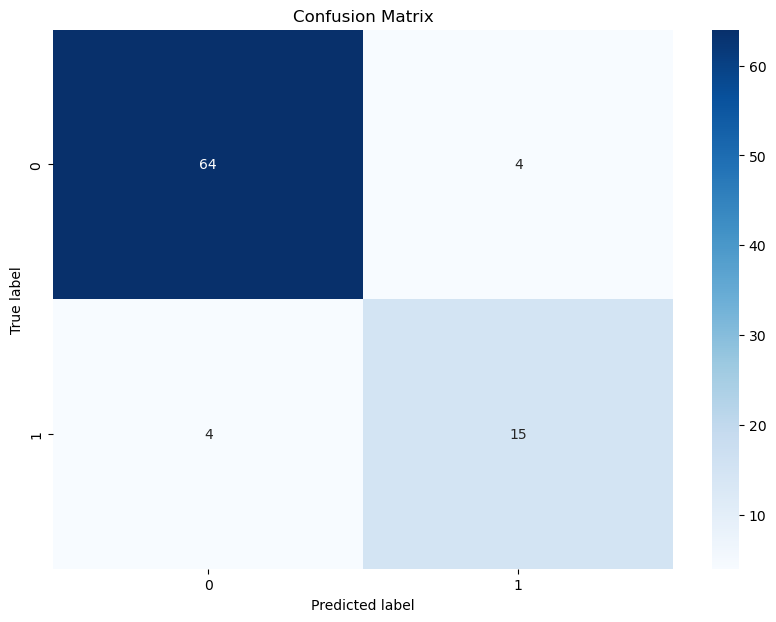

In [9]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [10]:
modelo_path = save_model(modelo, metrics, df)

Modelo salvo em: c:\Users\Hugo\OneDrive\Documents\GitHub\IAventuras-em-c-digo\challenge\churn_models\V2\churn_model_20250407_194752.pkl
Métricas salvas em: c:\Users\Hugo\OneDrive\Documents\GitHub\IAventuras-em-c-digo\challenge\churn_models\V2\metricas_20250407_194752.csv
